In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline


In [4]:
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['cleaned_data.csv']))
df.head()


Saving cleaned_data.csv to cleaned_data.csv


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
count,147.000000,147.000000,147.000000,147.000000,147
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.856463,3.055782,3.780272,1.208844,NaN
std,0.829100,0.437009,1.759111,0.757874,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.400000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [6]:
print("Missing values per column:")
print(df.isnull().sum())

print("\nDuplicate rows:", df.duplicated().sum())


Missing values per column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Duplicate rows: 0


In [7]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
sepal_length,147.0,5.856463,0.829100,4.3,5.1,5.8,6.4,7.9
sepal_width,147.0,3.055782,0.437009,2.0,2.8,3.0,3.3,4.4
petal_length,147.0,3.780272,1.759111,1.0,1.6,4.4,5.1,6.9
petal_width,147.0,1.208844,0.757874,0.1,0.3,1.3,1.8,2.5


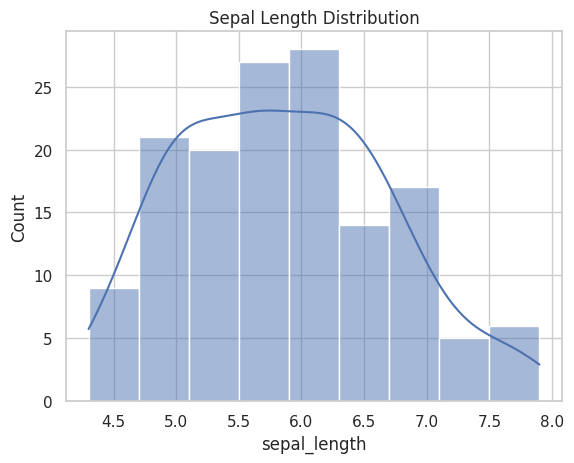

In [9]:
sns.histplot(df['sepal_length'], kde=True)
plt.title('Sepal Length Distribution')
plt.show()

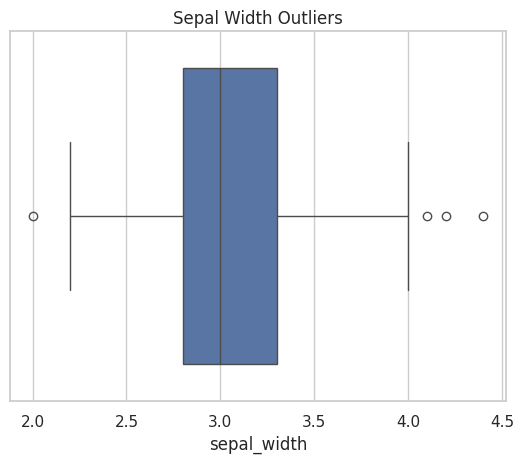

In [11]:
sns.boxplot(x=df['sepal_width'])
plt.title('Sepal Width Outliers')
plt.show()

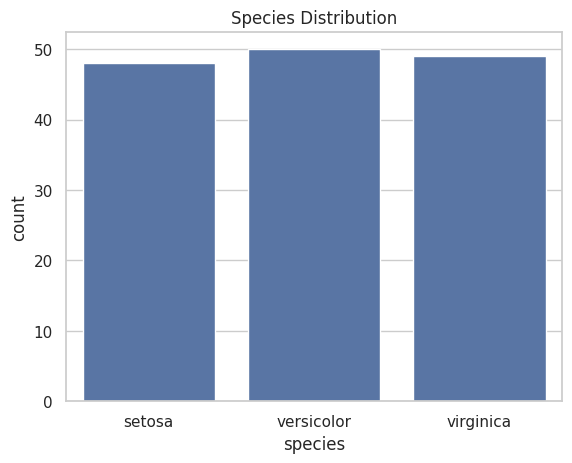

In [13]:
sns.countplot(x='species', data=df)
plt.title('Species Distribution')
plt.show()

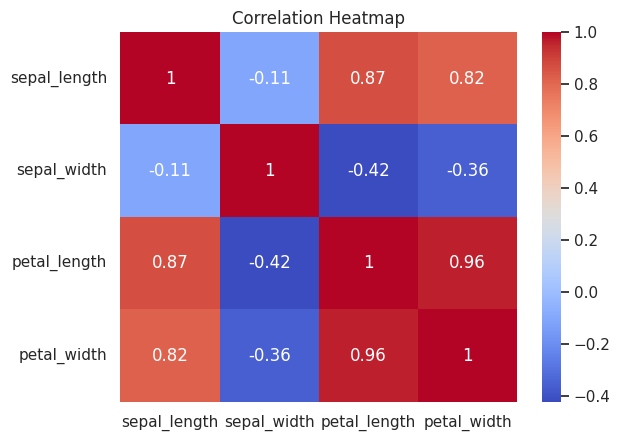

In [15]:
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

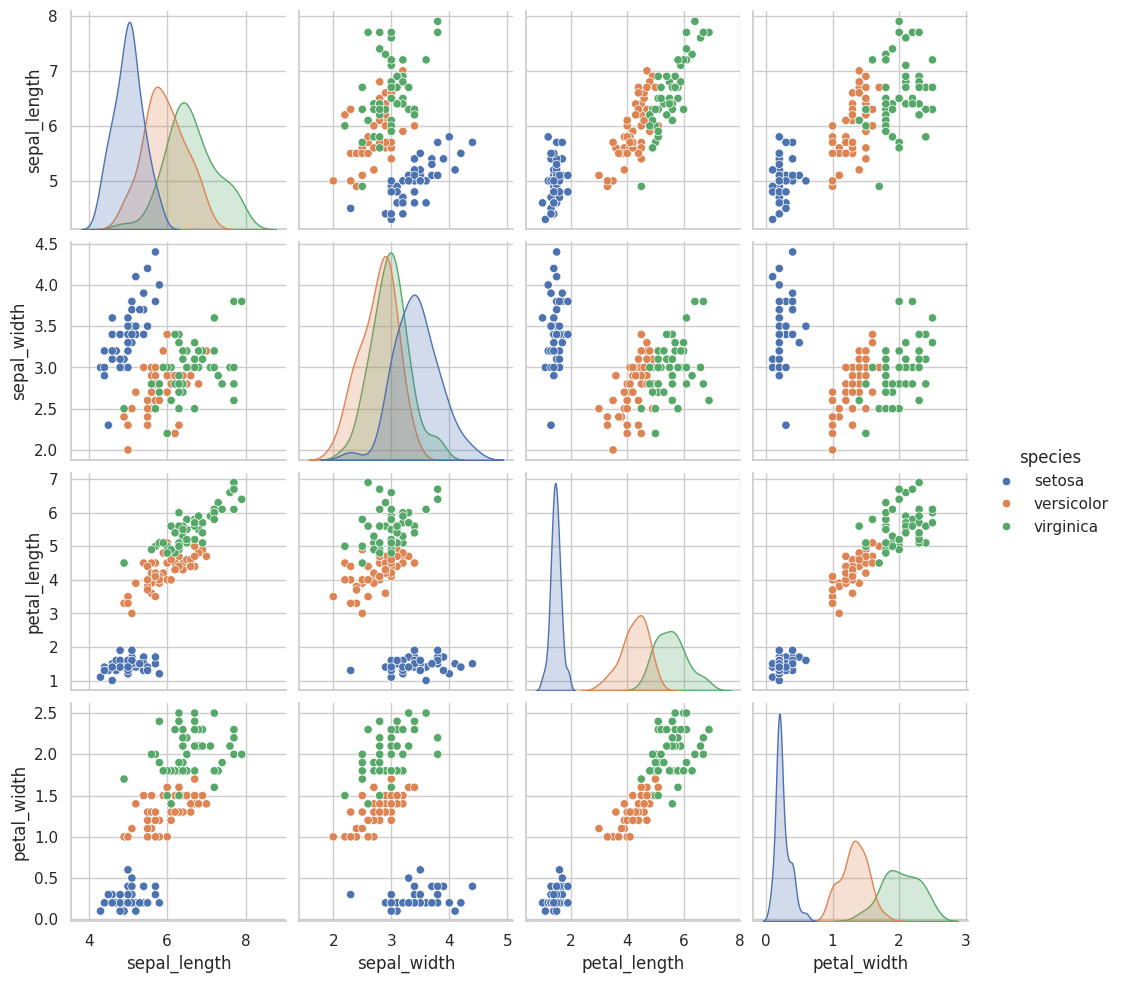

In [17]:
sns.pairplot(df, hue='species', vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.show()

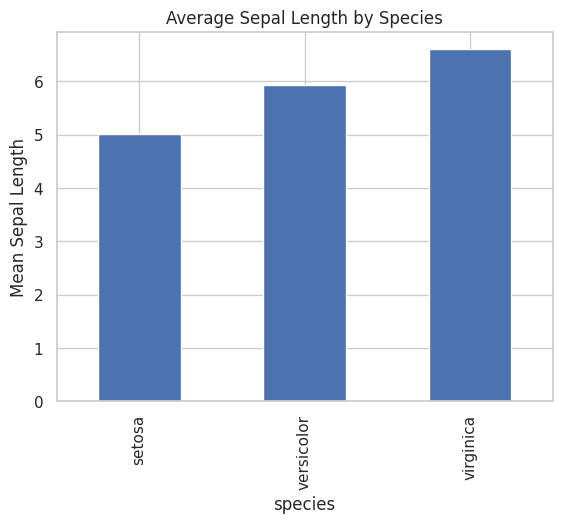

In [19]:
df.groupby('species')['sepal_length'].mean().plot(kind='bar')
plt.title('Average Sepal Length by Species')
plt.ylabel('Mean Sepal Length')
plt.show()

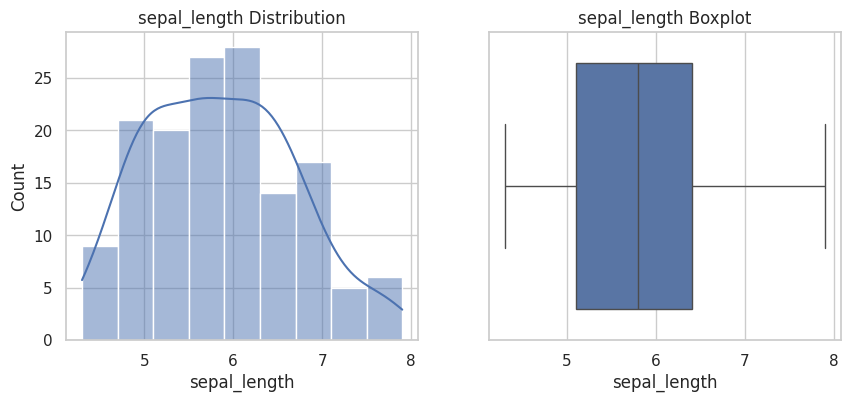

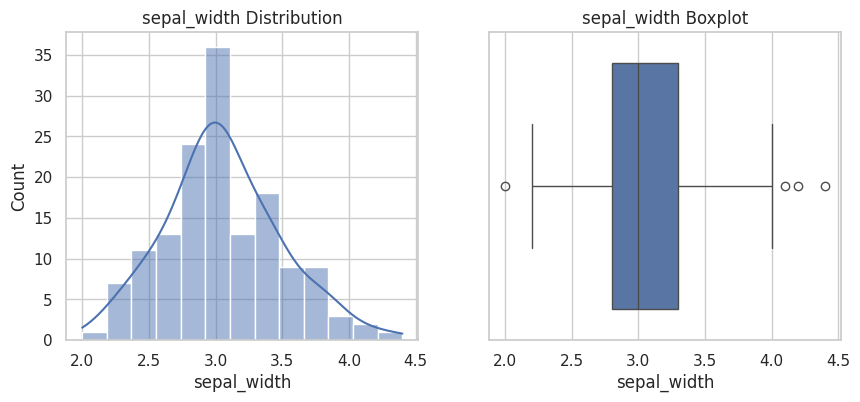

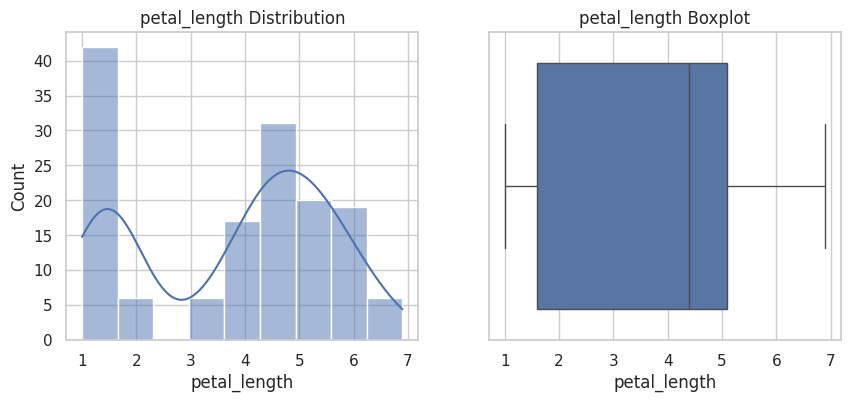

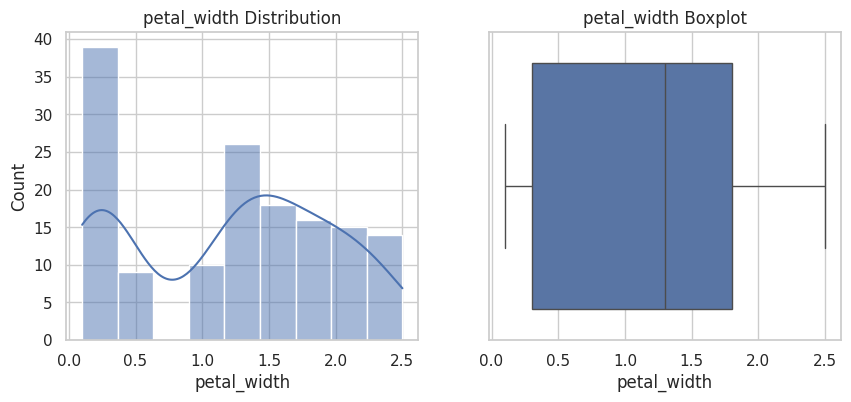

In [20]:
num_cols = df.select_dtypes(include=['number']).columns

for col in num_cols:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'{col} Boxplot')
    plt.show()


In [21]:
df.to_csv('eda_output.csv', index=False)
